# Model-Based Method
In these models the transition probability matrices p(s', r| s, a) are known

In [2]:
#%pip install gym

#importing dependencies
from gym import Env
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

# Building a dangerous gridworld

In [3]:
#this class defines a 2D coordinate system
class Coordinate(object):
  def __init__(self, x, y, is_dangerous):
    #changing x will move vertically and y will move horizontally
    self.x = x
    self.y = y
    self.danger = is_dangerous
  def __str__(self):
    return "({}, {}, {})".format(self.x, self.y, self.danger)

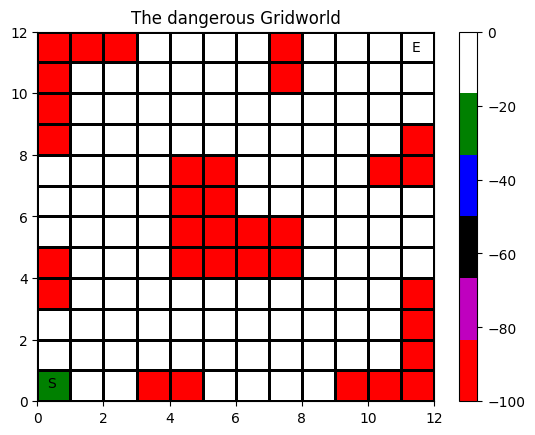

In [4]:
#We need extend the functionalities of the Env class (the superclass here is the env class)
#This is the environment class: where our agent will learn.
class dangerous_gridWorld(Env):
  #override the the following, in the Env class
  def __init__(self, grid_specs=[12,12], start_state=[0, 0], end_state=[11, 11], danger_states = [[False, False, False, True, True, False, False, False, False, True, True, True],
                                                                                                  [False, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [False, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [True, False, False, False, True, True, True, True, False, False, False, False],
                                                                                                  [False, False, False, False, True, True, True, True, False, False, False, False],
                                                                                                  [False, False, False, False, True, True, False, False, False, False, False, False],
                                                                                                  [False, False, False, False, True, True,  False, False, False, False, True, True],
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, False],
                                                                                                  [True, False, False, False, False, False, False, True, False, False, False, False],
                                                                                                  [True, True, True, False, False, False, False, True, False, False, False, False]]):

    #initialize out setting, state space, action and rewards
    self.grid_specs = grid_specs
    #Dynamics of the MDP
    #action space
    self.actions =  ['left', 'up', 'right', 'down']
    #state space (defines the shape of the gridworld)
    #the states in itself has the knowledge of whether it is dangerous
    self.states = [[Coordinate(i, j, danger_states[i][j]) for j in range(grid_specs[1])] for i in range(grid_specs[0])]
    #for a SSPP
    self.start_state = Coordinate(start_state[0], start_state[1], False)
    self.end_state = Coordinate(end_state[0], end_state[1], False)

    #since the transition probabilities are deterministic
    #(i.e.: next state and reward is determinitic and hence we don't need to define it)

  def get_D_i(self):
    D_i = np.zeros(shape=self.grid_specs, dtype=bool)
    for i in range(self.grid_specs[0]):
      for j in range(self.grid_specs[1]):
        if (self.states[i][j].danger==True):
          D_i[i][j] = True
        elif i==0 or j==0:
          if i==0 and (j<self.grid_specs[1]-1 and self.states[i][j+1].danger == True) or (j-1>0 and self.states[i][j-1].danger == True):
            D_i[i][j] = True
          elif j==0 and (i<self.grid_specs[0]-1 and self.states[i+1][j].danger == True) or (i-1>0 and self.states[i-1][j].danger == True):
            D_i[i][j] = True
          else:
            D_i[i][j] = False
        elif i==self.grid_specs[0]-1 or j==self.grid_specs[1]-1:
          if i==self.grid_specs[0]-1 and (j<self.grid_specs[1]-1 and self.states[i][j+1].danger == True) or (j-1>0 and self.states[i][j-1].danger == True):
            D_i[i][j] = True
          elif j==self.grid_specs[1]-1 and (i<self.grid_specs[0]-1 and self.states[i+1][j].danger == True) or (i-1>0 and self.states[i-1][j].danger == True):
            D_i[i][j] = True
          else:
            D_i[i][j] = False
        elif (self.states[i+1][j].danger == True or self.states[i-1][j].danger == True) or (self.states[i][j+1].danger == True or self.states[i][j-1].danger ==True):
          D_i[i][j] = True
    return D_i

  def step(self, state, action):
    #current state is of Coordinate type and action is a single string

    #define the dynamics of a single step
    #(0,0) is the start state and (7, 7) is the terminal state
    #Going outside the grid incurs a penalty of -5 and entering the dangerous states makes the penalty be as high as -20 (hoping teacher can save the day)
    #x axis and y axis are inverted here
    next_state = None
    #flag_out = False
    reward = -1
    if action == 'left':
      if state.y - 1 < 0:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #flag_out = True
      else:
        next_state = self.states[state.x][state.y-1]

    elif action == "up":
      if state.x + 1 > self.end_state.x:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #went out of the grid
      else:
        next_state = self.states[state.x+1][state.y]

    elif action == "right":
      if state.y + 1 > self.end_state.y:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #went out of the grid
      else:
        next_state = self.states[state.x][state.y+1]
        #if the next state is a danger state: then a reward of -20 will be encountered

    elif action == "down":
      if state.x - 1 < 0:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #flag_out = True
      else:
        next_state = self.states[state.x-1][state.y]
        #if the next state is a danger state: then a reward of -20 will be encountered
    else:
      print("Invalid Action")
      next_state = state
      reward = 0

    #if flag_out== True:
    #  reward = -20
    #if the next state is a danger state: then a reward of -20 will be encountered
    if self.states[next_state.x][next_state.y].danger == True:
      reward = -100

    done = False
    if next_state.x == self.end_state.x and next_state.y == self.end_state.y:
      done = True
    #an empty dictionary needs to be returned as prescribed by the documents. This is used for returning any extra information
    info = {}
    return next_state, reward, done, info

  def render(self, current_state, title=""):
    #render graphics for the environment
    mesh_gd = np.zeros((self.end_state.x+1, self.end_state.y+1))
    for i in range(mesh_gd.shape[0]):
      for j in range(mesh_gd.shape[1]):
        if self.states[i][j].danger == True:
          mesh_gd[i][j] = -100
        else:
          mesh_gd[i][j] = 0
    mesh_gd[current_state.x][current_state.y] = -20
    plt.pcolormesh(mesh_gd, edgecolors='black', linewidth=2, cmap = col.ListedColormap(['r', 'm', 'k', 'b', 'g', 'w']))
    plt.colorbar()
    #adjusting text according to the relative positioning
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The dangerous Gridworld"+title)

  def disp2(self, dang_states):
    mesh_gd = np.zeros((self.end_state.x+1, self.end_state.y+1))
    for i in range(mesh_gd.shape[0]):
      for j in range(mesh_gd.shape[1]):
        if self.states[i][j].danger == True:
          mesh_gd[i][j] = -100
        elif dang_states[i][j] == True:
          mesh_gd[i][j] = -40
        else:
          mesh_gd[i][j] = 0

    plt.pcolormesh(mesh_gd, edgecolors='black', linewidth=2, cmap = col.ListedColormap(['r', 'y', 'w']))
    plt.colorbar()
    #adjusting text according to the relative positioning
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The teacher's knowledge of the grid world")

  def reset(self):
    #reset at the end of an episode
    return self.start_state

  def is_terminal(self, state):
    if state.x == self.end_state.x and state.y == self.end_state.y:
      return True
    return False

  def __str__(self):
    print("states: ")
    for i in range(self.grid_specs[0]):
      for j in range(self.grid_specs[1]):
        print(self.states[i][j])
    print('Start State: {}'.format(self.start_state))
    print('End State: {}'.format(self.end_state))
    return "actions: {}".format(self.actions)

gw = dangerous_gridWorld()
#gw.render(Coordinate(0, 0, True))
gw.render(gw.start_state)
#gw.render(gw.end_state)
#n_state, reward = gw.step(gw.states[1][2], "down")
#print(n_state, reward)

# Policy Iteration

Evaluation:
Start with $\pi_{n}, V_0 = 0$
$$\large v_{k+1}(s) = \sum_a \pi_{n}(a | s) \sum_{s', r} p(s', r | s, a)[r + \gamma v_k(s')]$$
Obtain $V_{\pi_n}$ the updates converge

Improvement:

$$\large \pi_{n+1}(s) = \text{argmax}_a \sum_{s', r} p(s', r | s, a)[r + \gamma v_{\pi_{n}}(s')]$$

#### Here is a documentation for the functions in the `policy_itertion_Agent` class:



This documentation describes the purpose, arguments, and return values for each function in the `policy_itertion_Agent` class.

````python
class policy_itertion_Agent(object):
    """
    Agent implementing Policy Iteration for a tabular Markov Decision Process (MDP).
    """

    def __init__(self, env):
        """
        Initializes the agent with:
        - Value function (V)
        - Policy indicator (pi_indicator)
        - Policy probability matrix (pi_prob)
        - Discount factor (gamma)
        Args:
            env: The environment object.
        """
        ...

    def reset(self, env):
        """
        Resets the value function and policy to their initial states.
        Args:
            env: The environment object.
        """
        ...

    def reset_V(self, env):
        """
        Resets only the value function to zeros.
        Args:
            env: The environment object.
        """
        ...

    def update_P(self):
        """
        Updates the policy probability matrix (pi_prob) based on the current policy indicator.
        Returns:
            np.ndarray: Updated policy probability matrix.
        """
        ...

    def update_state(self, env, this_state):
        """
        Computes the value of a given state under the current policy using the Bellman update.
        Args:
            env: The environment object.
            this_state: The current state (Coordinate object).
        Returns:
            float: Updated value for the state.
        """
        ...

    def policy_evaluation(self, env, max_iter=1000, epsilon=1e-9):
        """
        Iteratively evaluates the current policy until convergence.
        Args:
            env: The environment object.
            max_iter (int): Maximum number of iterations.
            epsilon (float): Convergence threshold.
        """
        ...

    def greedy_action(self, env, this_state):
        """
        Finds all actions that maximize the value for a given state (greedy with respect to the value function).
        Args:
            env: The environment object.
            this_state: The current state (Coordinate object).
        Returns:
            list: Indices of actions that are optimal.
        """
        ...

    def policy_improvement(self, env):
        """
        Updates the policy to be greedy with respect to the current value function.
        Args:
            env: The environment object.
        """
        ...

    def policy_itertion(self, env):
        """
        Runs the policy iteration algorithm: alternates between policy evaluation and improvement until convergence.
        Args:
            env: The environment object.
        """
        ...

    def print_optimal_value_function(self, env):
        """
        Visualizes the optimal value function as a heatmap.
        Args:
            env: The environment object.
        """
        ...

    def print_optimal_policy(self, env):
        """
        Visualizes the optimal policy using arrows on the grid.
        Args:
            env: The environment object.
        """
        ...````


#### `Code`

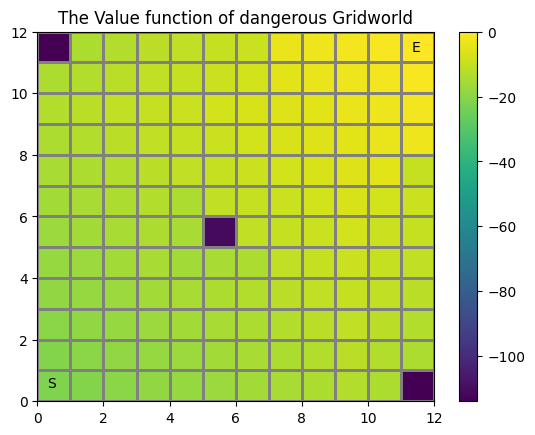

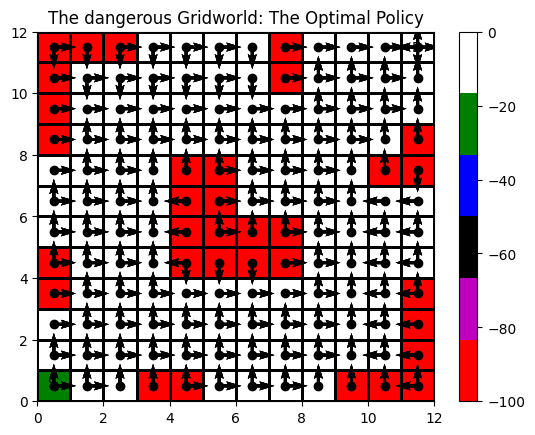

In [5]:
#Step 1: policy iteration (for getting the optimal policy) to get the optimal policy
#Step 2: (a) Q-learning (Sample based technique to get optimal value function and policy)
#        (b) SARSA/ and Expected Sarsa to compare performance
#Step 3: To find compare the performance of the teacher-student based algorithm with the above

class policy_itertion_Agent(object):
  #NOTE: env is the environment object

  def __init__(self, env):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    #generates the policy map
    #pi has 1 if you can select an action otherwise it will be 0
    self.pi_indicator = np.ones((env.grid_specs[0], env.grid_specs[1], len(env.actions))) #3D matrix
    #This will store the conditional probability p(s', r|s, a)
    #for this the P values will be equiprobable in all the next states that is optimal
    self.pi_prob = self.update_P()
    #discount factor
    self.gamma = 1

  def reset(self, env):
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    #generates the policy map
    #pi has 1 if you can select an action otherwise it will be 0
    self.pi_indicator = np.ones((env.grid_specs[0], env.grid_specs[1], len(env.actions))) #3D matrix
    #This will store the conditional probability p(s', r|s, a)
    #for this the P values will be equiprobable in all the next states that is optimal
    self.pi_prob = self.update_P()

  def reset_V(self, env):
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
  def update_P(self):
    return self.pi_indicator / (np.sum(self.pi_indicator, axis=2, keepdims=True))

  def update_state(self, env, this_state):
    # The value of the terminal state is always set to 0
    if env.is_terminal(this_state) == True:
      return 0
    #non terminal states
    update_value = 0
    for action in env.actions:
      #actions possible are same for everyone here
      next_state, reward, _, _ = env.step(this_state, action)
      #Bellman update rule, deterministic environment and hence there is no inner loop
      update_value = update_value + self.pi_prob[this_state.x, this_state.y, env.actions.index(action)]*(reward + self.gamma*self.V[next_state.x, next_state.y])
    return update_value

  def policy_evaluation(self, env, max_iter = 1000, epsilon = 1e-9):
    #finds the value function of the current policy
    for itr in range(max_iter):
      theta = 0
      #This is iteration over all the states
      for i in range(self.V.shape[0]):
        for j in range(self.V.shape[1]):
          if env.is_terminal(env.states[i][j]):
            break
          old_val = np.copy(self.V[i, j])
          self.V[i, j] = self.update_state(env, env.states[i][j])
          theta = np.maximum(theta, np.abs(self.V[i, j] - old_val))
      if theta < epsilon:
        break
      
  #return all the best actions
  def greedy_action(self, env, this_state):
    import math
    # The value of the terminal state is always set to 0
    if env.is_terminal(this_state) == True:
      pol_new = [0, 1, 2, 3] #returns the actions possible
      return pol_new
    #non terminal states
    max_value = -1*float('inf')
    temp_actions = []
    ctr = 0
    for action in env.actions:
      #actions possible are same for everyone here
      next_state, reward, _, _ = env.step(this_state, action)
      #Bellman update rule, deterministic environment and hence there is no inner loop
      next_value = (reward + self.gamma*self.V[next_state.x, next_state.y])
      #index of maximizing action
      if math.isclose(next_value, max_value):
        temp_actions.append(ctr)
      elif next_value > max_value:
        temp_actions =  []
        temp_actions.append(ctr)
        max_value = next_value

      ctr = ctr + 1

    return temp_actions

  def policy_improvement(self, env):
    for i in range(self.V.shape[0]):
      for j in range(self.V.shape[1]):
        #if env.is_terminal(env.states[i][j]):
        #    break
        #Need to get the optimal action
        best_actions = self.greedy_action(env, env.states[i][j])
        #resets the pi to change the values
        for ac in range(len(env.actions)):
          self.pi_indicator[i, j, ac] = 0
        for k in best_actions:
          #all greedy actions next
          self.pi_indicator[i, j, k] = 1

    self.pi_prob = self.update_P()

  #this is the policy iteration algorithm
  def policy_itertion(self, env):
    while True:
      old_V = np.copy(self.V)
      self.reset_V(env)
      self.policy_evaluation(env)
      #this improvement, once this ends improving, we are sure that the algorithm has converged
      self.policy_improvement(env)
      #once improvement is no longer possible
      if np.allclose(old_V, self.V):
        break

  def print_optimal_value_function(self, env):
    #env.render(env.start_state)
    plt.pcolormesh(self.V, edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The Value function of dangerous Gridworld")
    plt.colorbar()
    plt.show()
    #print(self.V)

  def print_optimal_policy(self, env):
    env.render(env.states[0][0], ": The Optimal Policy")
    for i in range(env.grid_specs[0]):
       for j in range(env.grid_specs[1]):
        plt.scatter(i+0.5, j+0.5, color='black')
        for k in range(len(env.actions)):
          #print arrow (x, y, dx, dy)
          #print along j first (because here we are printing from row-wise from bottom to up but pi_indicator,
          #and quiver follow caresian convention, which is opposite of pcolormesh convention)
          if self.pi_indicator[i, j, 0]==1:
            #left
            plt.quiver(j+0.5, i+0.5, -0.4, 0, color='black')
          if self.pi_indicator[i, j, 1]==1:
            #up
            plt.quiver(j+0.5, i+0.5, 0, 0.4, color='black')
          if self.pi_indicator[i, j, 2]==1:
            #right
            plt.quiver(j+0.5, i+0.5, 0.4, 0, color='black')
          if self.pi_indicator[i, j, 3]==1:
            #down
            plt.quiver(j+0.5, i+0.5, 0, -0.4, color='black')


#testing performance of policy iteration

agent_p_iter = policy_itertion_Agent(gw)
#agent_p_iter.reset(gw)
agent_p_iter.policy_itertion(gw)
agent_p_iter.print_optimal_value_function(gw)
agent_p_iter.print_optimal_policy(gw)

# Q-learning Algorithm: Tabular

$$\large Q_\pi(s, a) = \sum_{s', r} p(s', r | s, a)[r + \max_{a'\in\mathcal{A}(s')} \gamma Q_\pi(s', a')]$$

Implemented by exploring the world using the policy
$$\large Q_{n+1}(s, a) = Q_{n}(s, a) + \alpha_{n+1}(s,a) [r + \max_{a'\in\mathcal{A}(s')} \gamma Q_\pi(s', a') - Q_{n}(s, a)]$$

Completed run 0
Completed run 2000
Completed run 4000
Completed run 6000
Completed run 8000


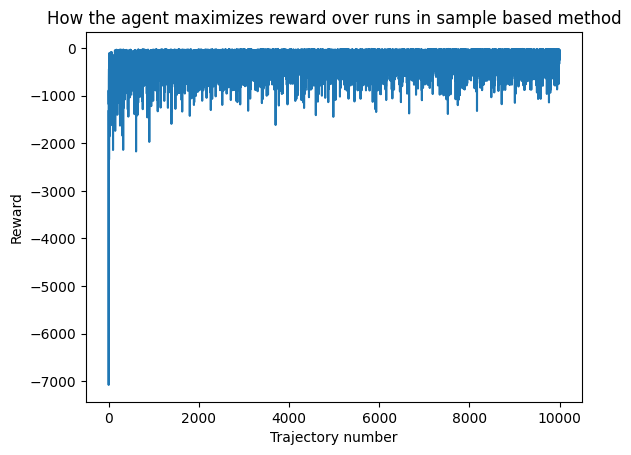

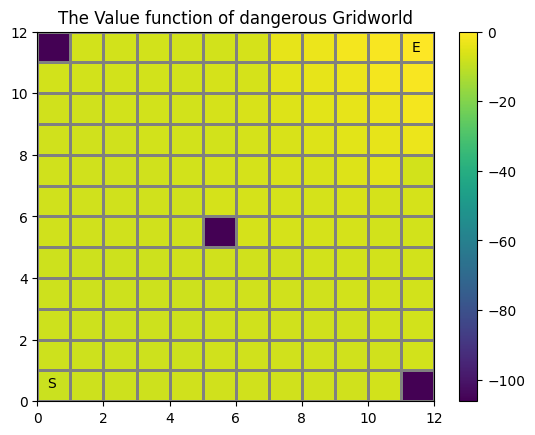

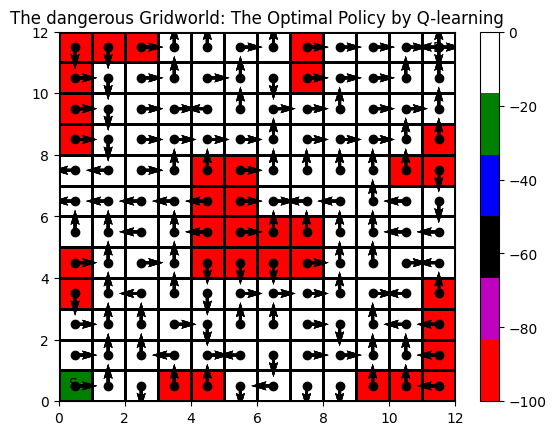

In [6]:
#testing the environment with sample based methods: Used (Q-learning): OFF Policy learning rule
class Q_learning_Agent(object):
  def __init__(self, env, eps=0.1):
    #eps -- for epsilon greedy sampling
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    #discount factor
    self.gamma = 1
    self.epsilon = eps
    #present dynamics
    self.prev_state = None
    self.prev_action = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def reset(self, env):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    self.prev_state = None
    self.prev_action = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def lr_scheduler(self, this_state, action):
    #a = b = 1 (lr = a/(m+b) : for the mth update)
    #return 0.1
    return 1/(1+self.num_visit[this_state.x, this_state.y, action])

  #breaks ties randomly
  def argmax(self, vec):
    import math
    max_value = np.max(vec)
    ctr = 0
    all_maxpos = []
    for val in vec:
      if math.isclose(val, max_value):
        all_maxpos.append(ctr)
      ctr += 1
    return all_maxpos

  #this is for exploration/exploration tradeoff
  def behav_action(self, env):
    qval_prev_state = self.Q[self.prev_state.x, self.prev_state.y, :]
    #this breaks ties randomly
    sample_uni_0_1 = np.random.random()
    #with prob 1-eps we choose a 'good' action
    if sample_uni_0_1 > self.epsilon:
      #here only faesible actions compete
      return np.random.choice(self.argmax(qval_prev_state))
    else:
      return np.random.choice(len(qval_prev_state))

  def target_action(self, env, this_state):
    #this will return the best action in a particular state
    return np.random.choice(self.argmax(self.Q[this_state.x, this_state.y, :]))

  def start(self, env):
    #this is a beginning of an episode
    self.prev_state = env.start_state
    #here action is chosen in accordance to the behaviour policy of the agent
    #we are choosing this action as a number, convert to actual action using env.actions
    #take action in an offpolicy way (here we are using epsilon greedy)
    self.prev_action = self.behav_action(env)

  def step(self, env, cumu_reward):
    #first 2 components represent the state and the second one represent the reward
    this_state, reward, _, _ = env.step(self.prev_state, env.actions[self.prev_action])
    cumu_reward += reward

    if env.is_terminal(this_state) == True:
      return self.end(env, reward), cumu_reward

    #this is chosen with respect to the target policy (what we wish to learn)
    maximizing_action = self.target_action(env, this_state)
    #Q-learning update rule  -- r + max_a Q(s',a) - Q(s,a)
    del_t = reward + self.gamma*self.Q[this_state.x, this_state.y, maximizing_action] - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]

    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t

    #Now we are in the next_state
    self.prev_state = this_state
    self.prev_action = self.behav_action(env)
    return False, cumu_reward

  def end(self, env, reward):
    #whenever this_state will be the end_state this will be called, for the end state you don't see the next state
    del_t = reward - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]

    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t
    #returns true when the current path ends
    return True

  def complete_trajectory(self, env):
    completed = False
    reward_rec = 0
    #this completes a trajectory
    while True:
      prev_state= self.prev_state
      prev_action = self.prev_action
      completed, reward_rec = self.step(env, reward_rec)
      if completed == True:
        break
      #updating the number of visits
      self.num_visit[prev_state.x, prev_state.y, prev_action] += 1
    return reward_rec

  def q_learning(self, env, max_runs=5000, avg_over=5):
    history = np.zeros((avg_over, max_runs))
    for a in range(avg_over):
      self.reset(env)
      for i in range(max_runs):
        self.start(env)
        history[a, i] = self.complete_trajectory(env)
        if i%2000 == 0:
          print("Completed run {}".format(i))

    avg_history = np.mean(history, axis=0)
    plt.plot(avg_history)
    plt.xlabel("Trajectory number")
    plt.ylabel("Reward")
    plt.title("How the agent maximizes reward over runs in sample based method")
    plt.show()
    return avg_history

  def compute_V_and_pi(self):
    #computes V* and pi*
    self.V = np.max(self.Q, axis=2)
    for i in range(self.V.shape[0]):
      for j in range(self.V.shape[1]):
        opt_act = self.argmax(self.Q[i, j, :])
        for ac in opt_act:
          self.pi_indicator[i, j, ac] = 1

  def display_num_visits(self):
    #env.render(env.start_state)
    plt.pcolormesh(np.sum(self.num_visit, axis=2), edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("number of visits in each state")
    plt.colorbar()
    plt.show()
    #print(self.V)

  def print_optimal_value_function(self, env):
    #env.render(env.start_state)
    plt.pcolormesh(self.V, edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The Value function of dangerous Gridworld")
    plt.colorbar()
    plt.show()
    #print(self.V)

  def print_optimal_policy(self, env):
    env.render(env.states[0][0], ": The Optimal Policy by Q-learning")
    for i in range(env.grid_specs[0]):
       for j in range(env.grid_specs[1]):
        plt.scatter(i+0.5, j+0.5, color='black')
        for k in range(len(env.actions)):
          #print arrow (x, y, dx, dy)
          #print along j first (because here we are printing from row-wise from bottom to up but pi_indicator,
          #and quiver follow caresian convention, which is opposite of pcolormesh convention)
          if self.pi_indicator[i, j, 0]==1:
            #left
            plt.quiver(j+0.5, i+0.5, -0.5, 0, color='black')
          if self.pi_indicator[i, j, 1]==1:
            #up
            plt.quiver(j+0.5, i+0.5, 0, 0.5, color='black')
          if self.pi_indicator[i, j, 2]==1:
            #right
            plt.quiver(j+0.5, i+0.5, 0.5, 0, color='black')
          if self.pi_indicator[i, j, 3]==1:
            #down
            plt.quiver(j+0.5, i+0.5, 0, -0.5, color='black')

q_agent = Q_learning_Agent(gw, 0.33)
q_agent.q_learning(gw, 10000, 1)
q_agent.compute_V_and_pi()
q_agent.print_optimal_value_function(gw)
q_agent.print_optimal_policy(gw)

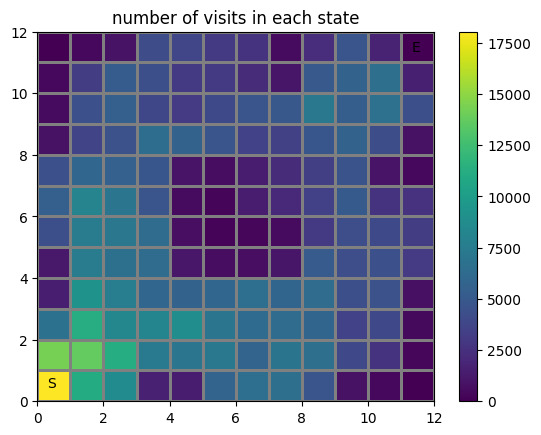

In [7]:
q_agent.display_num_visits()

# HW: Try Value Iteration

In [16]:
class ValueIterationAgent:
    def __init__(self, env, gamma=0.9, epsilon=1e-9):
        self.env = env
        self.gamma = gamma
        self.epsilon=epsilon
        self.V = np.zeros(env.grid_specs)
        self.policy = np.full(env.grid_specs, '', dtype=object)

    def run_value_iteration(self):
        while True:
            delta = 0
            for i in range(self.env.grid_specs[0]):
                for j in range(self.env.grid_specs[1]):
                    state = self.env.states[i][j]
                    if self.env.is_terminal(state):
                        continue
                    max_value = float('-inf')
                    best_action = None
                    for action in self.env.actions:
                        next_state, reward, _, _ = self.env.step(state, action)
                        v = reward + self.gamma * self.V[next_state.x][next_state.y]
                        if v > max_value:
                            max_value = v
                            best_action = action   
                    delta = max(delta, abs(self.V[i][j] - max_value))
                    self.V[i][j] = max_value
                    self.policy[i][j] = best_action
            if delta < self.epsilon:
                break

    def print_value_function(self):
        plt.pcolormesh(self.V, edgecolors='grey')
        plt.figtext(0.71, 0.84, "E")
        plt.figtext(0.14, 0.14, "S")
        plt.title("The Value function of dangerous Gridworld")
        plt.colorbar()
        plt.show()

    def print_policy(self):
        env = self.env
        env.render(env.states[0][0], ": The Optimal Policy")
        for i in range(env.grid_specs[0]):
            for j in range(env.grid_specs[1]):
                plt.scatter(i+0.5, j+0.5, color='black')
                action = self.policy[i][j]
                if action == 'left':
                    plt.quiver(j+0.5, i+0.5, -0.4, 0, color='black')
                elif action == 'up':
                    plt.quiver(j+0.5, i+0.5, 0, 0.4, color='black')
                elif action == 'right':
                    plt.quiver(j+0.5, i+0.5, 0.4, 0, color='black')
                elif action == 'down':
                    plt.quiver(j+0.5, i+0.5, 0, -0.4, color='black')
        plt.show()

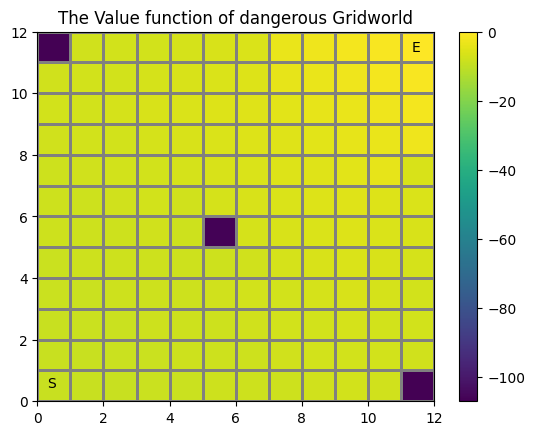

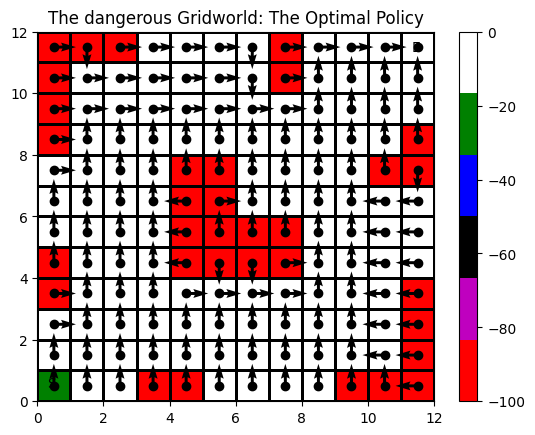

In [18]:
obj =ValueIterationAgent(gw)
obj.run_value_iteration()
obj.print_value_function()
obj.print_policy()